In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [22]:
returns = pd.read_excel(open('Data projet.xlsx', 'rb'), sheet_name='Returns')
roic = pd.read_excel(open('Data projet.xlsx', 'rb'), sheet_name='ROIC')

In [23]:
def transpose_changename(df,prefix):
    #Transposition
    df_tr = df.set_index("Dates").T

    #Renommage des colonnes
    for col in df_tr.columns:
        col_name = str(prefix) + str(col)[0:7]
        df_tr.rename(columns={col:col_name}, inplace=True)
    
    return df_tr

In [24]:
returns = returns.drop(returns.columns[[0,1,3]], axis = 1)
returns = returns.drop(index = [0,1,2,3,4])
returns.columns = returns.iloc[0]
returns = returns[1:]
returns = returns.T
returns.columns = returns.iloc[0]
returns = returns[1:]
returns.reset_index(inplace=True)
returns.columns.values[0] = "Dates"

returns["NTR CT Equity"].fillna(returns["NTR CT Equity"].median(), inplace=True)
returns["NTR US Equity"].fillna(returns["NTR US Equity"].median(), inplace=True)
returns["DOW US Equity"].fillna(returns["DOW US Equity"].median(), inplace=True)
returns["CTVA US Equity"].fillna(returns["CTVA US Equity"].median(), inplace=True)

returns_vf = transpose_changename(returns,"returns")
returns_vf.reset_index(inplace=True)
returns_vf.columns.values[0] = "Actifs"
returns_vf.head()

Dates,Actifs,returns2017-10,returns2017-11,returns2017-12,returns2018-01,returns2018-02,returns2018-03,returns2018-04,returns2018-05,returns2018-06,...,returns2021-12,returns2022-01,returns2022-02,returns2022-03,returns2022-04,returns2022-05,returns2022-06,returns2022-07,returns2022-08,returns2022-09
0,BP/ LN Equity,5.919372,-0.988737,6.988426,0.546154,-6.449286,2.560396,10.24053,4.804592,-0.400296,...,3.626525,14.98588,-4.400586,1.302829,-0.13804,12.52107,-13.72032,2.945457,6.65252,-6.079655
1,STERV FH Equity,10.90907,-2.246577,3.931891,7.955951,3.713166,5.921066,8.415009,2.725725,-4.206706,...,7.817748,10.0865,-4.304833,5.968121,0.961133,-3.003349,-18.85769,-2.110731,-2.613566,-14.31072
2,IP US Equity,0.791975,-0.288225,2.349408,8.491543,-4.425673,-10.33731,-3.499906,4.665303,-2.654206,...,3.207381,2.703278,-8.877665,6.018837,0.28169,5.683481,-13.66357,2.247191,-1.677647,-23.83469
3,UPM FH Equity,11.03876,0.068212,3.580244,8.171395,2.290289,7.340285,0.958194,2.068292,-2.465006,...,4.436296,-4.730337,-3.697308,-1.303543,6.038125,1.580805,-14.10452,3.575494,8.173311,-6.389768
4,NEM US Equity,-3.59904,2.295354,1.644609,7.969083,-5.702296,2.657297,0.563092,-0.916264,-2.783047,...,14.02992,-1.370526,8.222985,20.88398,-8.307112,-6.863418,-11.33698,-24.11597,-8.657244,2.939662


In [25]:
#roic : Return on Invested Capital
roic = roic.drop(roic.columns[[0,1, 2]], axis = 1)
roic = roic.drop(index = [0,1,2,3,4,5,6,7,8, 10,11])

roic.columns = roic.iloc[0]
roic = roic[1:] 
roic.columns.values[0] = "Dates"


Dates,Actifs,roic40451,roic40543,roic40633,roic40724,roic40816,roic40908,roic40999,roic41090,roic41182,...,roic43921,roic44012,roic44104,roic44196,roic44286,roic44377,roic44469,roic44561,roic44651,roic44742
0,BP/ LN Equity,-5.0064,-3.8612,-3.396,11.2155,12.8167,13.7231,12.0522,8.3804,8.2218,...,-1.428,-11.6114,-12.7558,-11.5313,-7.26,4.21,3.9532,4.46,-11.3004,-7.2426
1,STERV FH Equity,5.1078,7.6947,8.3741,8.3722,7.0572,4.9549,3.9227,3.625,3.7966,...,6.5211,7.0847,7.2149,5.3349,5.262,5.7433,7.4469,8.7195,9.4419,9.3697
2,IP US Equity,4.8096,7.3868,10.496,10.9066,11.2495,10.2002,9.3368,8.7097,7.7276,...,5.1191,4.925,4.1272,3.2337,5.3017,5.1771,8.1864,9.4555,10.0533,11.3943
3,UPM FH Equity,5.4457,5.8743,6.5796,6.5403,3.7876,3.4755,2.8927,2.178,3.1778,...,8.6712,7.6085,5.9954,5.0002,5.3392,6.5083,9.7374,10.2615,9.3597,8.8481
4,NEM US Equity,16.7487,17.0815,16.0324,16.1902,15.5645,6.1936,6.084,5.1508,3.844,...,8.2051,7.4406,8.1303,9.1086,7.7524,8.8009,5.8004,1.0831,0.8725,0.4019


# K means

In [26]:
returns_vf.set_index('Actifs', inplace=True)
returns_vf.head()

Dates,returns2017-10,returns2017-11,returns2017-12,returns2018-01,returns2018-02,returns2018-03,returns2018-04,returns2018-05,returns2018-06,returns2018-07,...,returns2021-12,returns2022-01,returns2022-02,returns2022-03,returns2022-04,returns2022-05,returns2022-06,returns2022-07,returns2022-08,returns2022-09
Actifs,,,,,,,,,,,,,,,,,,,,,
BP/ LN Equity,5.919372,-0.988737,6.988426,0.546154,-6.449286,2.560396,10.24053,4.804592,-0.400296,-1.368019,...,3.626525,14.98588,-4.400586,1.302829,-0.13804,12.52107,-13.72032,2.945457,6.65252,-6.079655
STERV FH Equity,10.90907,-2.246577,3.931891,7.955951,3.713166,5.921066,8.415009,2.725725,-4.206706,-15.46006,...,7.817748,10.0865,-4.304833,5.968121,0.961133,-3.003349,-18.85769,-2.110731,-2.613566,-14.31072
IP US Equity,0.791975,-0.288225,2.349408,8.491543,-4.425673,-10.33731,-3.499906,4.665303,-2.654206,3.168203,...,3.207381,2.703278,-8.877665,6.018837,0.28169,5.683481,-13.66357,2.247191,-1.677647,-23.83469
UPM FH Equity,11.03876,0.068212,3.580244,8.171395,2.290289,7.340285,0.958194,2.068292,-2.465006,-0.611367,...,4.436296,-4.730337,-3.697308,-1.303543,6.038125,1.580805,-14.10452,3.575494,8.173311,-6.389768
NEM US Equity,-3.59904,2.295354,1.644609,7.969083,-5.702296,2.657297,0.563092,-0.916264,-2.783047,-2.731371,...,14.02992,-1.370526,8.222985,20.88398,-8.307112,-6.863418,-11.33698,-24.11597,-8.657244,2.939662


In [67]:
X = returns_vf.values 
sc = StandardScaler()
X_normalise = sc.fit_transform(X)

score = []

for i in range(2,20):
    km = KMeans(n_clusters=i,random_state=0).fit(X_normalise)
    preds = km.predict(X_normalise)
    score.append(-km.score(X_normalise))

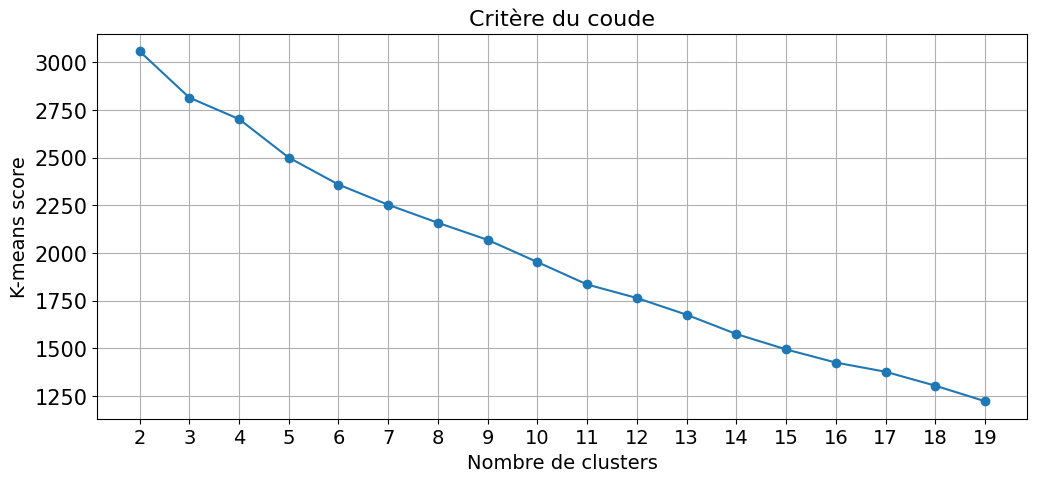

In [35]:
plt.figure(figsize=(12,5))
plt.title("Critère du coude",fontsize=16)
plt.plot(range(2,20),score,marker='o')
plt.grid(True)
plt.xlabel('Nombre de clusters',fontsize=14)
plt.ylabel('K-means score',fontsize=14)
plt.xticks(range(2,20),fontsize=14)
plt.yticks(fontsize=15)
plt.show()


In [68]:
# Créons une dataframe avec pour chaque commune son cluster associé :
km = KMeans(n_clusters=5,random_state=0).fit(X_normalise)
preds = km.fit_predict(X_normalise)
returns_vf['cluster'] = preds


In [39]:
for i in returns_vf['cluster'].value_counts().index:
    titres = list(returns_vf[returns_vf["cluster"] == i].index)
    titres = ', '.join(str(x) for x in titres)
    print("Cluster {} contient:".format(i),  titres)

Cluster 0 contient: STERV FH Equity, IP US Equity, UPM FH Equity, NEM US Equity, ABX CT Equity, FMC US Equity, TTE FP Equity, ADM US Equity, PKX US Equity, BHP US Equity, TECK/B CT Equity, RIO US Equity, WIL SP Equity, MNDI LN Equity, AAL LN Equity, ALA CT Equity, WLK US Equity, GLEN LN Equity, WY US Equity, SUN US Equity, WRK US Equity, PBA US Equity, NTR CT Equity, NTR US Equity, DOW US Equity, CTVA US Equity, CVX US Equity, WMB US Equity, KMI US Equity
Cluster 1 contient: BP/ LN Equity, XOM US Equity, VLO US Equity, COP US Equity, CVE CT Equity, MPC US Equity, PSX US Equity, ET US Equity, VNOM UW Equity, OXY US Equity, OKE US Equity, PXD US Equity, TRGP US Equity, DVN US Equity, HES US Equity, MRO US Equity, APA US Equity, EOG US Equity, FANG US Equity, S5ENRS Index
Cluster 4 contient: NUE US Equity, FCX US Equity, MOS US Equity, AA US Equity, MTS SQ Equity
Cluster 3 contient: SLB US Equity, BKR US Equity, HAL US Equity
Cluster 2 contient: CTRA US Equity, EQT US Equity


# Clustering CAH


In [69]:
roic_1 = roic.drop(columns = ["Dates"], axis = 1)

# colonnes qui ont plus de 50% de valeurs manquantes : 
liste = []
for col in roic_1.columns:
    if roic_1[col].isna().sum()/roic_1.shape[0]> 0.5:
        liste.append(col)

print(liste)

In [59]:
roic = roic.drop(columns = liste , axis = 1)

In [60]:
val_imput = []
for col in roic.columns:
    if roic[col].isna().sum()/roic.shape[0]> 0:
        val_imput.append(col)

for c in tqdm(val_imput):
    roic[c] = roic[c].fillna(roic[c].median())

0it [00:00, ?it/s]


In [61]:
roic_vf = transpose_changename(roic,"roic")
roic_vf.reset_index(inplace=True)
roic_vf.columns.values[0] = "Actifs"
roic_vf.set_index('Actifs', inplace=True)
roic_vf.head()

Dates,roic40451,roic40543,roic40633,roic40724,roic40816,roic40908,roic40999,roic41090,roic41182,roic41274,...,roic43921,roic44012,roic44104,roic44196,roic44286,roic44377,roic44469,roic44561,roic44651,roic44742
Actifs,,,,,,,,,,,,,,,,,,,,,
BP/ LN Equity,-5.0064,-3.8612,-3.396,11.2155,12.8167,13.7231,12.0522,8.3804,8.2218,4.8861,...,-1.428,-11.6114,-12.7558,-11.5313,-7.26,4.21,3.9532,4.46,-11.3004,-7.2426
STERV FH Equity,5.1078,7.6947,8.3741,8.3722,7.0572,4.9549,3.9227,3.625,3.7966,5.4055,...,6.5211,7.0847,7.2149,5.3349,5.262,5.7433,7.4469,8.7195,9.4419,9.3697
IP US Equity,4.8096,7.3868,10.496,10.9066,11.2495,10.2002,9.3368,8.7097,7.7276,7.5861,...,5.1191,4.925,4.1272,3.2337,5.3017,5.1771,8.1864,9.4555,10.0533,11.3943
UPM FH Equity,5.4457,5.8743,6.5796,6.5403,3.7876,3.4755,2.8927,2.178,3.1778,-10.0178,...,8.6712,7.6085,5.9954,5.0002,5.3392,6.5083,9.7374,10.2615,9.3597,8.8481
NEM US Equity,16.7487,17.0815,16.0324,16.1902,15.5645,6.1936,6.084,5.1508,3.844,10.5168,...,8.2051,7.4406,8.1303,9.1086,7.7524,8.8009,5.8004,1.0831,0.8725,0.4019


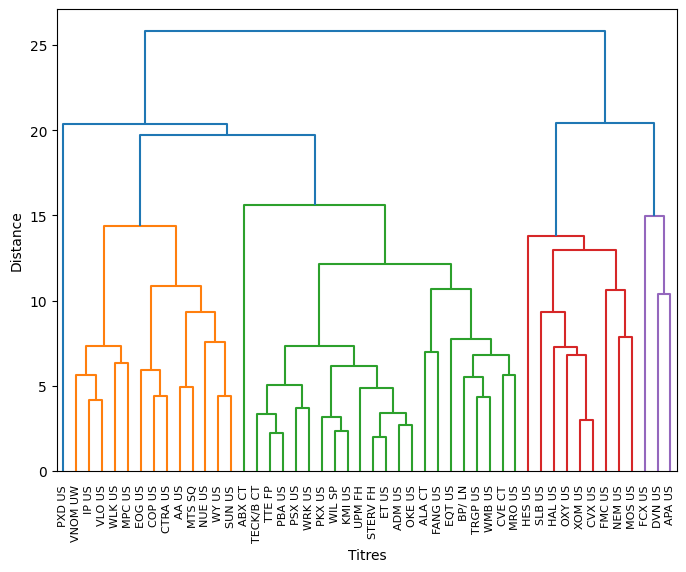

In [65]:
# Etape 1 : normalisation 
X = roic_vf.values 
sc = StandardScaler()
X_normalise = sc.fit_transform(X)

# on enlève 'Equity' pour que le graphique soit plus petit
def remove_pattern(liste, pattern):
    new_liste = []
    for string in liste:
        new_string = string.replace(pattern, '')
        new_liste.append(new_string)
    return new_liste


pattern = 'Equity'
labels = remove_pattern(roic_1.columns, pattern)

# Etape 3 : HCA
# ward : minimise la variance des distances entre les observations des clusters

Z = linkage(X_normalise, method='ward')

fig = plt.figure(figsize=(8, 6))

dendrogram(Z, labels = labels)

plt.xlabel("Titres")
plt.ylabel('Distance')

plt.savefig(f'dendogramme.png')


In [66]:
# fixe le nombre de clusters
num_clusters = 5

clusters = fcluster(Z, num_clusters, criterion='maxclust')

cluster_names = {}
for i in range(1, num_clusters + 1):
    cluster_names[i] = [labels[index] for index, cluster in enumerate(clusters) if cluster == i]

for i in range(1, num_clusters + 1):
    print("Cluster", i, ":", cluster_names[i])

Cluster 1 : ['IP US ', 'VLO US ', 'NUE US ', 'COP US ', 'WLK US ', 'MPC US ', 'WY US ', 'VNOM UW ', 'SUN US ', 'AA US ', 'MTS SQ ', 'CTRA US ', 'EOG US ']
Cluster 2 : ['BP/ LN ', 'STERV FH ', 'UPM FH ', 'ABX CT ', 'TTE FP ', 'ADM US ', 'PKX US ', 'TECK/B CT ', 'WIL SP ', 'CVE CT ', 'ALA CT ', 'PSX US ', 'ET US ', 'WRK US ', 'PBA US ', 'OKE US ', 'TRGP US ', 'MRO US ', 'WMB US ', 'KMI US ', 'EQT US ', 'FANG US ']
Cluster 3 : ['PXD US ']
Cluster 4 : ['NEM US ', 'XOM US ', 'FMC US ', 'MOS US ', 'OXY US ', 'CVX US ', 'SLB US ', 'HES US ', 'HAL US ']
Cluster 5 : ['FCX US ', 'DVN US ', 'APA US ']
